In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

2025-05-18 13:59:37.327719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747576777.341423  115470 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747576777.345228  115470 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747576777.356565  115470 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747576777.356580  115470 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747576777.356582  115470 computation_placer.cc:177] computation placer alr

## Generate Data

In [2]:
X_train = np.linspace(-1,1,20)

In [3]:
y_train = np.array([-0.6561,-0.3099,-0.59035,-0.50855,-0.285,
                    -0.2443,-0.02445,0.000135,-0.2006,0.07475,
                    -0.1422,0.06515,0.15265,0.3521,0.28415,
                    0.5524,0.23115,0.20835,0.4211,0.60485])

In [4]:
X_test = np.linspace(-1,1,20)

In [5]:
y_test = np.array([-0.69415,-0.451,-0.43005,-0.4484,-0.1475,
                   -0.5019,-0.28055,0.24595,-0.21425,-0.0286,
                   0.23415,0.46575,0.07955,0.1973,0.0719,
                   0.3639,0.5536,0.3365,0.50705,0.33435])

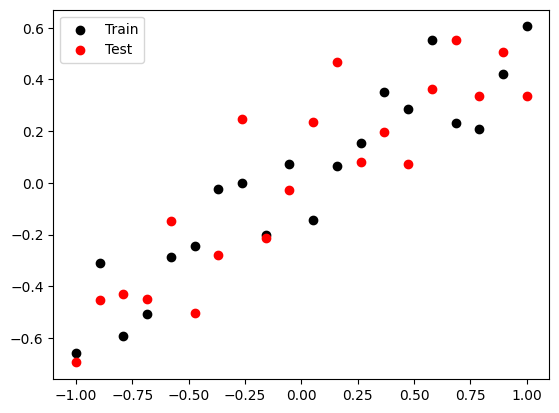

In [6]:
plt.scatter(X_train,y_train,c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.legend()
plt.show()

## Regression Model

In [7]:
model = Sequential()
model.add(Dense(128, input_dim = 1,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

/home/zahir/Tf_gpu/tfgpu1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747576780.315160  115470 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1747576781.596773  115539 service.cc:152] XLA service 0x7fa5ac005120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747576781.596809  115539 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-05-18 13:59:41.621251: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash rep

In [8]:
# Evaluate the Model
_,train_mse = model.evaluate(X_train,y_train,verbose=0)
_,test_mse = model.evaluate(X_test,y_test,verbose=0)
print('Train : {}, Test : {}'.format(train_mse,test_mse))

Train : 0.003858119249343872, Test : 0.04552359879016876


In [9]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


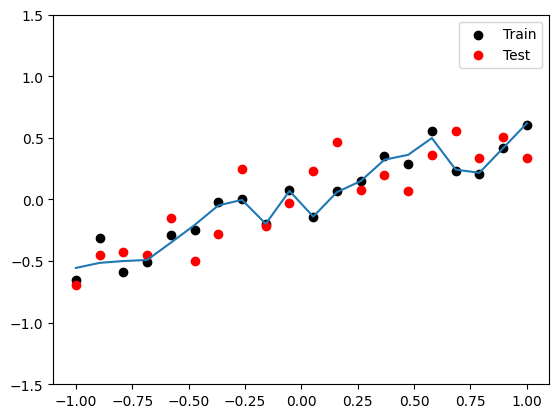

In [10]:
plt.figure()
plt.scatter(X_train,y_train,c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

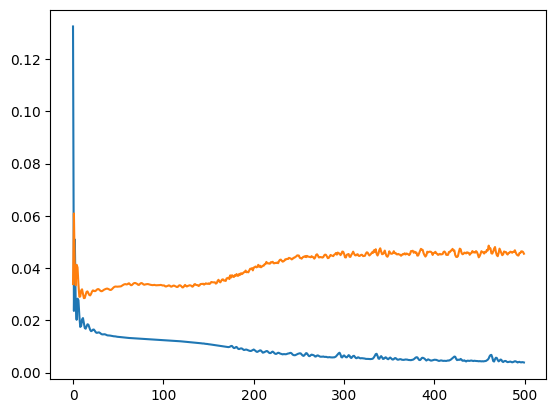

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Dropout Model

In [12]:
model = Sequential()

model.add(Dense(128, input_dim = 1,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [13]:
# Evaluate the Model
_,train_mse = model.evaluate(X_train,y_train,verbose=0)
_,test_mse = model.evaluate(X_test,y_test,verbose=0)
print('Training loss : {}, Testing loss : {}'.format(train_mse,test_mse))

Training loss : 0.013543951325118542, Testing loss : 0.035034846514463425


In [14]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


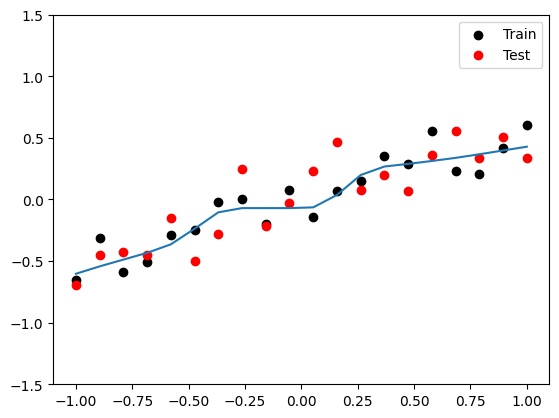

In [15]:
plt.figure()
plt.scatter(X_train,y_train,c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

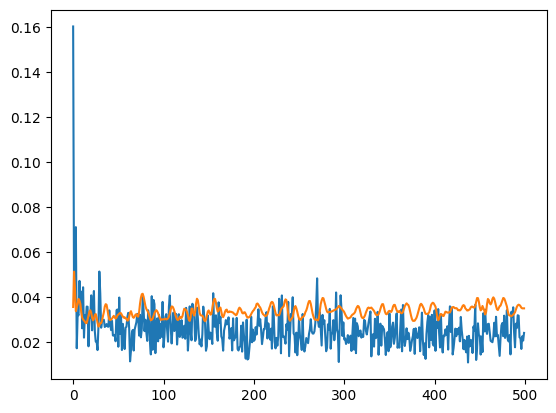

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])